In [1]:
!pip install numpy --upgrade


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import cv2    # opencv-python to be installed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary
from tqdm import tqdm

In [3]:
# Data Path
data_path = r'C:\Users\happy\ML PROJECT\LungDisease\Data'

In [7]:
os.getcwd()
os.chdir("..")

In [8]:
os.getcwd()

'c:\\Users\\happy\\ML PROJECT\\LungDisease'

In [ ]:
class_name = ['NORMAL' , 'PNEUMONIA']


In [16]:
def get_list_of_files(path):
    files_list = os.listdir(path)
    return files_list

file_list_normal_train = get_list_of_files(data_path+"/train/"+class_name[0])
file_list_normal_test = get_list_of_files(data_path+"/test/"+class_name[0])
file_list_pneumonia_train = get_list_of_files(data_path+"/train/"+class_name[1])
file_list_pneumonia_test = get_list_of_files(data_path+"/test/"+class_name[1])


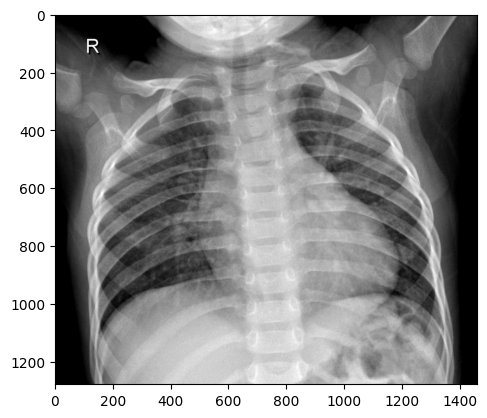

In [13]:
rand_img_no = np.random.randint(0 , len(file_list_normal_train))
img = data_path +r'\\train\\NORMAL\\' + file_list_normal_train[rand_img_no]
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(1160, 1640, 3)


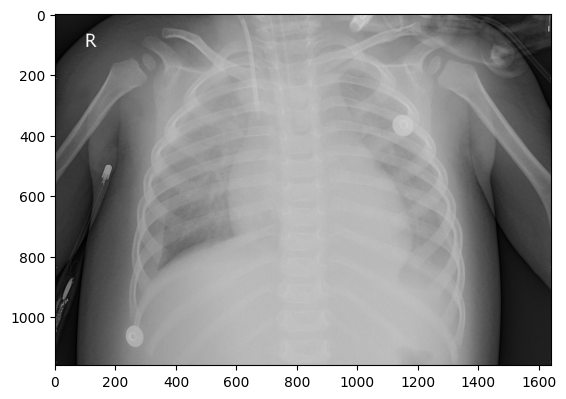

In [19]:
img = data_path + r'\\train\\PNEUMONIA\\'+ file_list_pneumonia_train[np.random.randint(0,len(file_list_pneumonia_train))]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [20]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.1 , contrast=0.1 , saturation=0.1 , hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
    
])

In [32]:
train_data = datasets.ImageFolder(os.path.join(data_path , 'train') , transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(data_path , 'test') , transform=test_transform)

train_loader = DataLoader(train_data , batch_size=2 , shuffle=True , pin_memory=True)
test_loader = DataLoader(test_data , batch_size=2 , shuffle=False , pin_memory=True)

class_name = train_data.classes
print(class_name)
train_loader._dataset_kind

['NORMAL', 'PNEUMONIA']


0

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net , self).__init__()

        self.convolution_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3 , out_channels=8 , kernel_size=(3 , 3 ) ,padding= 0  ,bias=True  ),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )
        self.pooling1 = nn.MaxPool2d(2 , 2)


        self.convolution_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8 , out_channels=20 , kernel_size=(3,3) , padding=0 , bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.pooling2 = nn.MaxPool2d(2,2)

        self.convolution_block3 = nn.Sequential(
            nn.Conv2d(in_channels= 20 , out_channels=10 , kernel_size=(1,1) , padding=0 , bias= True),
            nn.ReLU() , 
            nn.BatchNorm2d(10)

        )
        self.pooling3 = nn.MaxPool2d(2,2)



        self.convolution_block4 = nn.Sequential(
            nn.Conv2d(in_channels=10 , out_channels=20 , kernel_size=(3,3) , padding=0 , bias= True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.convolution_block5 = nn.Sequential(
            nn.Conv2d(in_channels=20 , out_channels=32 , kernel_size=(1,1) , padding=0 , bias= True),
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )
        self.convolution_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
#     
        self.convolution_block7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        self.convolution_block8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )
        self.convolution_block9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )



        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)

        )
        self.convolution_block_out = nn.Sequential(
            nn.Conv2d(in_channels=16 , out_channels=2 , kernel_size=(4,4) , padding=0 , bias=True)

        )


    def forward(self , X):
        X = self.convolution_block1(X)
        X = self.pooling1(X)
        X = self.convolution_block2(X)
        X = self.pooling2(X)
        X = self.convolution_block3(X)
        X = self.pooling3(X)
        X = self.convolution_block4(X)
        X = self.convolution_block5(X)
        X = self.convolution_block6(X)
        X = self.convolution_block7(X)
        X = self.convolution_block8(X)
        X = self.convolution_block9(X)
        X = self.gap(X)
        X = self.convolution_block_out(X)
        X = X.view(-1 , 2)
        return F.sigmoid(X)



        

In [26]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available Processor {}".format(device))
model = Net().to(device)

summary(model , input_size=(3 , 224 ,224))

Available Processor cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 222, 222]             224
              ReLU-2          [-1, 8, 222, 222]               0
       BatchNorm2d-3          [-1, 8, 222, 222]              16
         MaxPool2d-4          [-1, 8, 111, 111]               0
            Conv2d-5         [-1, 20, 109, 109]           1,460
              ReLU-6         [-1, 20, 109, 109]               0
       BatchNorm2d-7         [-1, 20, 109, 109]              40
         MaxPool2d-8           [-1, 20, 54, 54]               0
            Conv2d-9           [-1, 10, 54, 54]             210
             ReLU-10           [-1, 10, 54, 54]               0
      BatchNorm2d-11           [-1, 10, 54, 54]              20
        MaxPool2d-12           [-1, 10, 27, 27]               0
           Conv2d-13           [-1, 20, 25, 25]           1,820
             Re

In [ ]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

def train(model , device , train_loader , optimizer , epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx , (data , target) in enumerate(pbar):
        data , target = data.to(device) , target.to(device)

        optimizer.zero_grad()
        y_pred = model(data)

        loss = F.nll_loss(y_pred , target)
        train_loss.append(loss)

        loss.backward()
        optimizer.step()

        pred = y_pred.argmax(dim=1 , keepdim = True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc=f'Loss={loss.item()} Batch_id = {batch_idx} accuracy = {100*correct/processed:0.2f}')
        train_acc.append(100*correct/processed)

def test(model , device , test_loader):
    model.eval()
    test_loss = 0 
    correct = 0 
    with torch.no_grad():
        for data , target in test_loader:
            data , target = data.to(device) , target.to(device)
            output = model(data)

            test_loss += F.nll_loss(output , target , reduction='sum').item()
            pred = output.argmax(dim = 1 , keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_loss.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))
    




In [35]:
model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters() , lr = 0.01 , momentum=0.8)
scheduler = StepLR(optimizer , step_size=6 , gamma=0.5)
EPOCHS =  4

for epoch in range(EPOCHS):
    print("EPOCH"  , epoch)
    train(model , device , train_loader , optimizer , epoch)
    scheduler.step()
    


EPOCH 0


Loss=-0.9999480247497559 Batch_id = 2341 accuracy = 76.81: 100%|██████████| 2342/2342 [03:12<00:00, 12.16it/s]


EPOCH 1


Loss=-0.9992579817771912 Batch_id = 927 accuracy = 78.93:  40%|███▉      | 928/2342 [00:58<01:29, 15.84it/s]


KeyboardInterrupt: 